In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
%matplotlib inline 
df= pd.read_csv('drinks.csv')

df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [2]:
#Data types 
df.dtypes

country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object

In [3]:
#Number of wine servings per continent
df.groupby('continent').wine_servings.sum()

continent
Africa            862
Asia              399
Europe           6400
North America     564
Oceania           570
South America     749
Name: wine_servings, dtype: int64

In [4]:
#analysis of beer servings for each continent
df_test=df.groupby('continent').beer_servings.sum()
df_test.describe()

count       6.000000
mean     3414.833333
std      2720.507116
min      1435.000000
25%      1747.750000
50%      2679.500000
75%      3323.250000
max      8720.000000
Name: beer_servings, dtype: float64

In [5]:
df_test=df.groupby('continent').beer_servings.max()
df_test

continent
Africa           376
Asia             247
Europe           361
North America    285
Oceania          306
South America    333
Name: beer_servings, dtype: int64

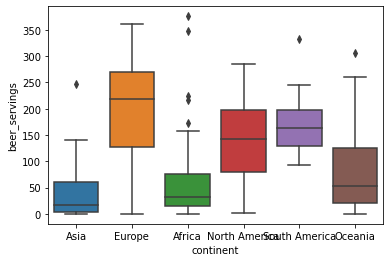

In [6]:
#show the number of beer servings on each continent.
sns.boxplot(x="continent",y="beer_servings",data=df)

(0.0, 405.7178365579212)

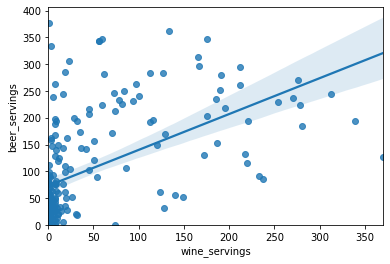

In [7]:
#Use regplot  to determine if the number of wine servings is negatively or positively correlated with the number of beer servings.
sns.regplot(x="wine_servings",y="beer_servings",data=df)
plt.ylim(0,)

In [ ]:
#From the graph we can see that wine and beer servings are positively correlated with each other

In [8]:
#Fit a linear regression model to predict the 'total_litres_of_pure_alcohol' using the number of 'wine_servings' then calculate  𝑅2
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
x=df[['total_litres_of_pure_alcohol']]
y=df[['wine_servings']]
lm.fit(x,y)
print('Intercept = ',lm.intercept_)
print('Coefficient = ',lm.coef_)
yhat=lm.predict(x)
print('First fous predicted values are ',yhat[0:4])
print('Value of R square = ',lm.score(x,y))

Intercept =  [-17.06341177]
Coefficient =  [[14.10065737]]
First fous predicted values are  [[-17.06341177]
 [ 52.02980935]
 [ -7.19295161]
 [157.78473964]]
Value of R square =  0.4456875459787605


In [9]:
x=df[['total_litres_of_pure_alcohol']]
Yhat = lm.predict(x)

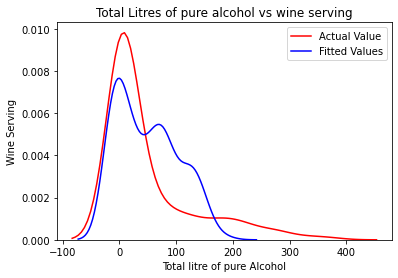

In [10]:
plt.figure()


ax1 = sns.distplot(df['wine_servings'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Total Litres of pure alcohol vs wine serving')
plt.xlabel('Total litre of pure Alcohol')
plt.ylabel('Wine Serving')

plt.show()
plt.close()

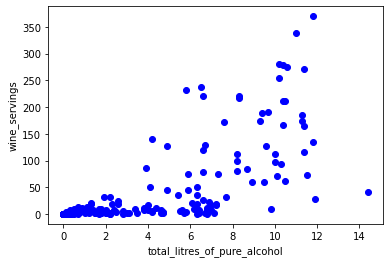

In [11]:
#Use the list of features to predict the 'total_litres_of_pure_alcohol', split the data into training and testing and determine the  𝑅2  on the test data
msk = np.random.rand(len(df)) < 0.8
train = df[msk]
test = df[~msk]
plt.scatter(train.total_litres_of_pure_alcohol, train.wine_servings,  color='blue')
plt.xlabel("total_litres_of_pure_alcohol")
plt.ylabel("wine_servings")
plt.show()

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
from sklearn.metrics import r2_score

x=df[['total_litres_of_pure_alcohol']]
y=df[['wine_servings']]
regr.fit (x,y)
train_x = np.asanyarray(train[['total_litres_of_pure_alcohol']])
train_y = np.asanyarray(train[['wine_servings']])
regr.fit (train_x, train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[14.72938775]]
Intercept:  [-17.54821084]


In [13]:
from sklearn.metrics import r2_score
train_x = np.asanyarray(train[['total_litres_of_pure_alcohol']])
train_y = np.asanyarray(train[['wine_servings']])
test_x = np.asanyarray(test[['total_litres_of_pure_alcohol']])
test_y = np.asanyarray(test[['wine_servings']])
test_y_ = regr.predict(test_x)
print("R2-score: %.2f" % r2_score(test_y_ , test_y) )

R2-score: -0.43


Text(0, 0.5, 'wine_servings')

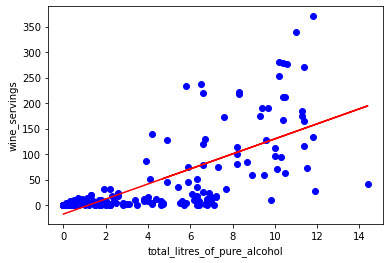

In [14]:
plt.scatter(train.total_litres_of_pure_alcohol, train.wine_servings,  color='blue')
plt.plot(train_x, regr.coef_[0][0]*train_x + regr.intercept_[0], '-r')
plt.xlabel("total_litres_of_pure_alcohol")
plt.ylabel("wine_servings")

In [15]:
#PipeLine
x = df[['wine_servings']]
y = df[['total_litres_of_pure_alcohol']]

In [16]:
from sklearn.preprocessing import PolynomialFeatures

In [17]:
pr=PolynomialFeatures(degree=2)
pr

PolynomialFeatures(degree=2, include_bias=True, interaction_only=False,
                   order='C')

In [18]:
x_p=pr.fit_transform(x)

In [19]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [20]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model',LinearRegression())]

In [21]:
pipe=Pipeline(Input)
pipe

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [22]:
pipe.fit(x,y)

Pipeline(memory=None,
         steps=[('scale',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('polynomial',
                 PolynomialFeatures(degree=2, include_bias=False,
                                    interaction_only=False, order='C')),
                ('model',
                 LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                                  normalize=False))],
         verbose=False)

In [23]:
ypipe=pipe.predict(x)
ypipe[0:4]

array([[2.64931944],
       [5.84712713],
       [3.55746927],
       [9.75712327]])

In [24]:
lm.fit(x, y)
# Find the R^2
print('The R-square is: ', lm.score(x, y))

The R-square is:  0.4456875459787605


In [25]:
#Ridge Regression
from sklearn.linear_model import Ridge

In [26]:
RigeModel=Ridge(alpha=0.1)

In [27]:
RigeModel.fit(train_x, train_y)
yhat = RigeModel.predict(test_x)
print('predicted:', yhat[0:4])
#print('test set :', test_y[0:4].values)

predicted: [[ 54.62562763]
 [165.09126202]
 [ 45.78837688]
 [ 56.09850276]]


In [28]:
lm.score(x,y)

0.4456875459787605